# Personalized Stress Detection System

# Background

### Motivation: Dell Global Fitness Challenge

Stress is a common issue in modern society and can have significant impacts on health and well-being. Being able to predict an individual's stress level could help in early detection and intervention, potentially preventing health issues and improving quality of life. Therefore, this project aims to predict the personalized stress detection based on various features. The dataset is downloaded from [Kaggle]() and [Google Dataset Search](https://figshare.com/articles/dataset/Sleep_Health_and_Lifestyle_Data_Set_Part_2_/24803142/1)

# Import libraries

In [514]:
#for data preprocessing
import pandas as pd

#for matrix math
import numpy as np

#for data visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#Standardise data value
from sklearn.preprocessing import StandardScaler

#for splitting data into training and testing sets
from sklearn.model_selection import train_test_split 

#imbalance data
from imblearn.over_sampling import SMOTE

#Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#supervised algorithm
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier    
from sklearn.tree import DecisionTreeClassifier        
from sklearn.svm import SVC                         
from sklearn.naive_bayes import GaussianNB            
from sklearn.neighbors import KNeighborsClassifier  

#remove warning message
import warnings
warnings.filterwarnings("ignore")

# Data Understanding
## Describe Data ##
The dataset has 13 columns, and with 559 entries in total. The data types for the dataset consists of object type, integer type, and float type in which 1 columns are float type, 7 column is integer type and 5 columns are object type.

#### Data Dictionary #####

Person ID: An identifier for each individual.<br>
Gender: The gender of the person (Male/Female).<br>
Age: The age of the person in years.<br>
Occupation: The occupation or profession of the person.<br>
Sleep Duration (hours): The number of hours the person sleeps per day.<br>
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.<br>
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.<br>
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.<br>
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).<br>
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.<br>
Heart Rate (bpm): The resting heart rate of the person in beats per minute.<br>
Daily Steps: The number of steps the person takes per day.<br>

##### Float type #####
"Sleep Duration"
##### Integer type #####
"Person ID", "Age", "Quality of Sleep", "Physical Activiy Level", "Stress level", "Heart Rate", "Daily Steps"
##### Object type #####
"Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder"

##### Categorical values #####
Nominal values: "Gender", "Occupation", "Blood Pressure", "Sleep Disorder" <br>
Ordinal values: "BMI Category"

##### Numerical values #####
Interval values: "Quality of Sleep"<br>
Ratio values: "Sleep Duration", "Age", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"<br>

#### Missing Values ####
As in further investigation, the dataset contains 375 missing values in "Sleep Disorder" variable. 

#### X variables ####
All columns are X variables except for "Stress".

#### Y variable ####
"Stress" which implies the level of health.


In [515]:
#import dataset used
stress_data = pd.read_csv("./personalized_stress_dataset.csv")

#display first 5 rows
stress_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [516]:
#Display the data types, non-null counts, and memory usage.
stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                559 non-null    int64  
 1   Gender                   559 non-null    object 
 2   Age                      559 non-null    int64  
 3   Occupation               559 non-null    object 
 4   Sleep Duration           559 non-null    float64
 5   Quality of Sleep         559 non-null    int64  
 6   Physical Activity Level  559 non-null    int64  
 7   Stress Level             559 non-null    int64  
 8   BMI Category             559 non-null    object 
 9   Blood Pressure           559 non-null    object 
 10  Heart Rate               559 non-null    int64  
 11  Daily Steps              559 non-null    int64  
 12  Sleep Disorder           184 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 56.9+ KB


In [517]:
#Statistical summary
stress_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,280.000000,39.987478,7.114132,7.271914,58.758497,5.463327,70.182469,6820.751342
std,161.513673,8.099616,0.742149,1.133293,19.961450,1.674711,3.875617,1528.814803
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,140.500000,33.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5500.000000
50%,280.000000,38.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,419.500000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,559.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [518]:
#number of rows and columns
stress_data.shape

(559, 13)

In [519]:
#detect missing value in data frame
stress_data.isnull().any()

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder              True
dtype: bool

In [520]:
#Missing values per column
stress_data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             375
dtype: int64

# Data Preparation #
## Select Data ##
All the data columns are selected in predicting the outcome of the stress level. The missing values and outliers that exist in the dataset are handled in a proper and formal way to maximize the accuracy, precision and recall of the results.

#### Handle Missing Values ####
As we can observe that there are 375 null values for Sleep Disorder column in the dataset. The presence of "Nan" value indicates that the individual does not have sleep disorder.
Therefore, we will replace it with the term "Nothing".

Also, we can observe that in the "BMI Category" column, the term "Normal" and "Normal Weight" have same meaning. Hence, we replace the value with "Normal" for consistency.

#### Handle Data Transformation #####
<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Numerical Data</th>
      <th style='text-align: center;border: 1px solid black;'>Categorical Data</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>The numerical data that present in the dataset are transformed by standardizing the values using StandardScaler in the sklearn.preprocessing library after the missing values have been handled. Stadardizing is required as the column values of the categorical data is within the range 0-4 while the column values of numerical data can be range to thousands.</td>
      <td style='text-align: left;border: 1px solid black;'>The categorical data that present in the dataset are transformed to numerical representations (string to numeric) before handling the missing values by using the categorical function in the pandas library. It is required to transform the data because most of the machine learning algorithms can only process numerical values. </td> 
  </tr>
</table>

#### Merge Categorical Data and Numerical Data ####
After the data preprocessing have been done, the processed and cleaned data are merge by using the concatenate function in the pandas library.

#### Using SMOTE #####
In the dataset, since the labels for the dataset are not equally-numbered, the SMOTE function is used to balance the number of occurrence of a label. "Not minority" is used as to resample all the labels except for the minority label that exists in the dataset.

In [521]:
#fill missing values with "Nothing"
stress_data = stress_data.fillna("Nothing")
stress_data.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing


In [522]:
#replace the Normal Weight with Normal as it is more similar term with Normal
stress_data["BMI Category"] = stress_data["BMI Category"].replace("Normal Weight", "Normal")

In [523]:
#check if there are any duplicate rows
duplicate_rows = stress_data[stress_data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

#drop the duplicate rows if any


Duplicate Rows:
Empty DataFrame
Columns: [Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder]
Index: []


In [524]:
#check the unique values of the column "Occupation"
stress_data['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [525]:
#split the 'Blood Pressure' column into two new columns 'Systolic BP' and 'Diastolic BP'
stress_data[['Systolic BP', 'Diastolic BP']] = stress_data['Blood Pressure'].str.split('/', expand=True)
    
# Convert the new columns to numeric type
stress_data[['Systolic BP', 'Diastolic BP']] = stress_data[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)
    
# Drop the original 'Blood Pressure' column
stress_data = stress_data.drop('Blood Pressure', axis=1)

stress_data.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Nothing,126,83


In [526]:
#rename the columns to remove spaces in the column names and replace them with underscores for easier access
stress_data.columns = stress_data.columns.str.replace(' ', '_')
stress_data.head(1)

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Nothing,126,83


In [527]:
#categorical data (those that not in numericalData variable)
categoricalData = stress_data[["Gender", "Occupation", "Sleep_Disorder", "BMI_Category"]]

#print
categoricalData.head()

,Gender,Occupation,Sleep_Disorder,BMI_Category
0,Male,Software Engineer,Nothing,Overweight
1,Male,Doctor,Nothing,Normal
2,Male,Doctor,Nothing,Normal
3,Male,Sales Representative,Sleep Apnea,Obese
4,Male,Sales Representative,Sleep Apnea,Obese


In [528]:
#change the string into numeric 
GenderNum = pd.Categorical(categoricalData["Gender"]).codes.astype('int64')
OccupationNum = pd.Categorical(categoricalData["Occupation"]).codes.astype('int64')
SleepDisorderNum = pd.Categorical(categoricalData["Sleep_Disorder"]).codes.astype('int64')
BMICategoryNum = pd.Categorical(categoricalData["BMI_Category"]).codes.astype('int64')

#add the col into the table
categoricalData["Gender"] = GenderNum 
categoricalData["Occupation"] = OccupationNum 
categoricalData["Sleep_Disorder"] = SleepDisorderNum
categoricalData["BMI_Category"] = BMICategoryNum 

In [529]:
#print to see is there any columns with null
categoricalData.head()

,Gender,Occupation,Sleep_Disorder,BMI_Category
0,1,9,1,2
1,1,1,1,0
2,1,1,1,0
3,1,6,2,1
4,1,6,2,1


In [530]:
#numerical data
numericalData = stress_data[["Person_ID", "Age", "Physical_Activity_Level", "Heart_Rate", "Daily_Steps", "Systolic_BP", "Diastolic_BP"]]

#print
numericalData.head()

,Person_ID,Age,Physical_Activity_Level,Heart_Rate,Daily_Steps,Systolic_BP,Diastolic_BP
0,1,27,42,77,4200,126,83
1,2,28,60,75,10000,125,80
2,3,28,60,75,10000,125,80
3,4,28,30,85,3000,140,90
4,5,28,30,85,3000,140,90


#### Due to the inconsistencies that occurred between the training data and the raw data for prediction, we will standardize the numerical data using StandardScaler after data cleaning and preprocessing.

In [531]:

# #standardize the numerical data
# scaler = StandardScaler()
# numericalData.iloc[:,1:] =scaler.fit_transform(numericalData.iloc[:,1:])

In [532]:
#concatenate the categorical data and numerical data together as nwData
nwData = pd.concat([categoricalData,numericalData.iloc[:,1:], stress_data["Sleep_Duration"], stress_data["Quality_of_Sleep"], stress_data["Stress_Level"]],axis=1)
nwData.head()

,Gender,Occupation,Sleep_Disorder,BMI_Category,Age,Physical_Activity_Level,Heart_Rate,Daily_Steps,Systolic_BP,Diastolic_BP,Sleep_Duration,Quality_of_Sleep,Stress_Level
0,1,9,1,2,27,42,77,4200,126,83,6.1,6,6
1,1,1,1,0,28,60,75,10000,125,80,6.2,6,8
2,1,1,1,0,28,60,75,10000,125,80,6.2,6,8
3,1,6,2,1,28,30,85,3000,140,90,5.9,4,8
4,1,6,2,1,28,30,85,3000,140,90,5.9,4,8


In [533]:
#change the target variable "Stress_Level" to 0 and 1 based on the stress level (0-4 = 0, 5-10 = 1)
nwData['Stress_Level'] = nwData['Stress_Level'].apply(lambda x: 0 if x < 5 else 1)
nwData.head()

,Gender,Occupation,Sleep_Disorder,BMI_Category,Age,Physical_Activity_Level,Heart_Rate,Daily_Steps,Systolic_BP,Diastolic_BP,Sleep_Duration,Quality_of_Sleep,Stress_Level
0,1,9,1,2,27,42,77,4200,126,83,6.1,6,1
1,1,1,1,0,28,60,75,10000,125,80,6.2,6,1
2,1,1,1,0,28,60,75,10000,125,80,6.2,6,1
3,1,6,2,1,28,30,85,3000,140,90,5.9,4,1
4,1,6,2,1,28,30,85,3000,140,90,5.9,4,1


# Data Visualization

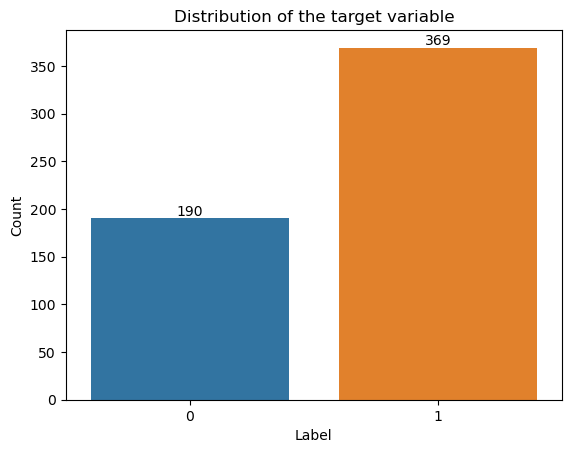

In [534]:
#Plot the distribution of the target variable
ax = sns.countplot(x='Stress_Level', data=nwData)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of the target variable')

# Adding the count values to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

plt.show()

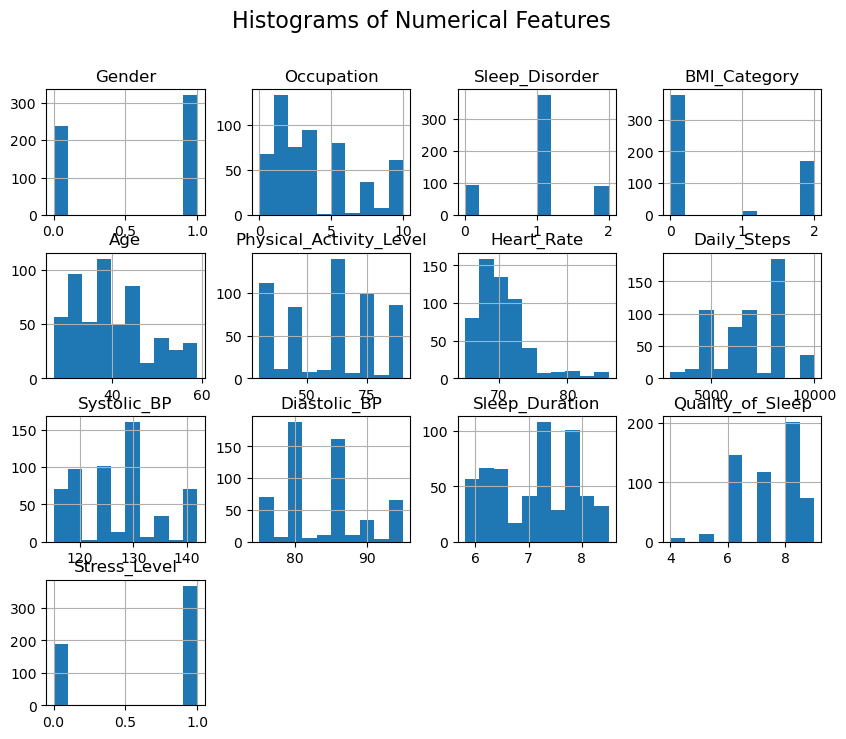

In [535]:
# Histograms for each numerical feature
nwData.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

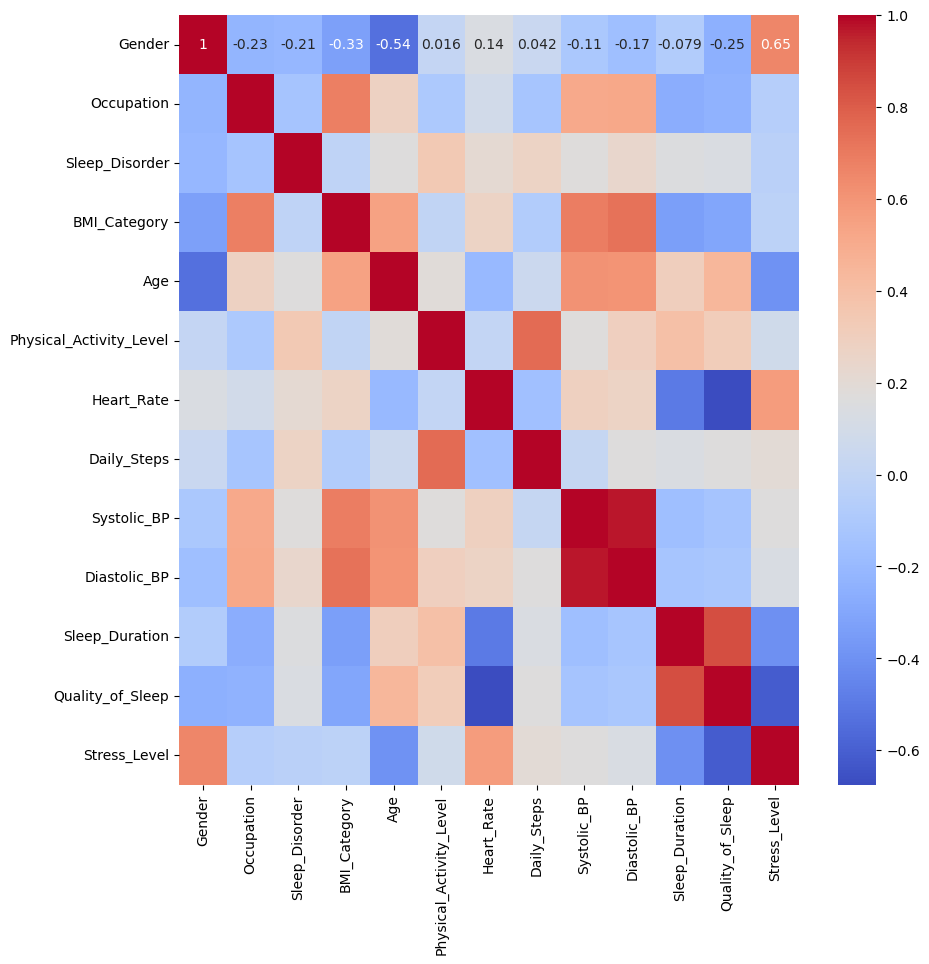

In [536]:
#Plot the heatmap to see the correlation between the features and the target variable
plt.figure(figsize = (10, 10))
sns.heatmap(nwData.corr(), cmap = 'coolwarm', annot = True)
plt.show

**Positively Correlated columns:**
* "Quality of Sleep" and "Sleep Duration" 
* "Occupation" and "BMI Category"
* "Systolic BP" and "BMI Category"
* "Diastolic BP" and "BMI Category"

**Negatively Correlated columns:**
* "Heart Rate" and "Quality of Sleep"
* "Heart Rate" and "Sleep Duration"

**No correlation with Target column: Stress level:**
* "Sleep Disorder"
* "Physical Activity Level".

<function matplotlib.pyplot.show(close=None, block=None)>

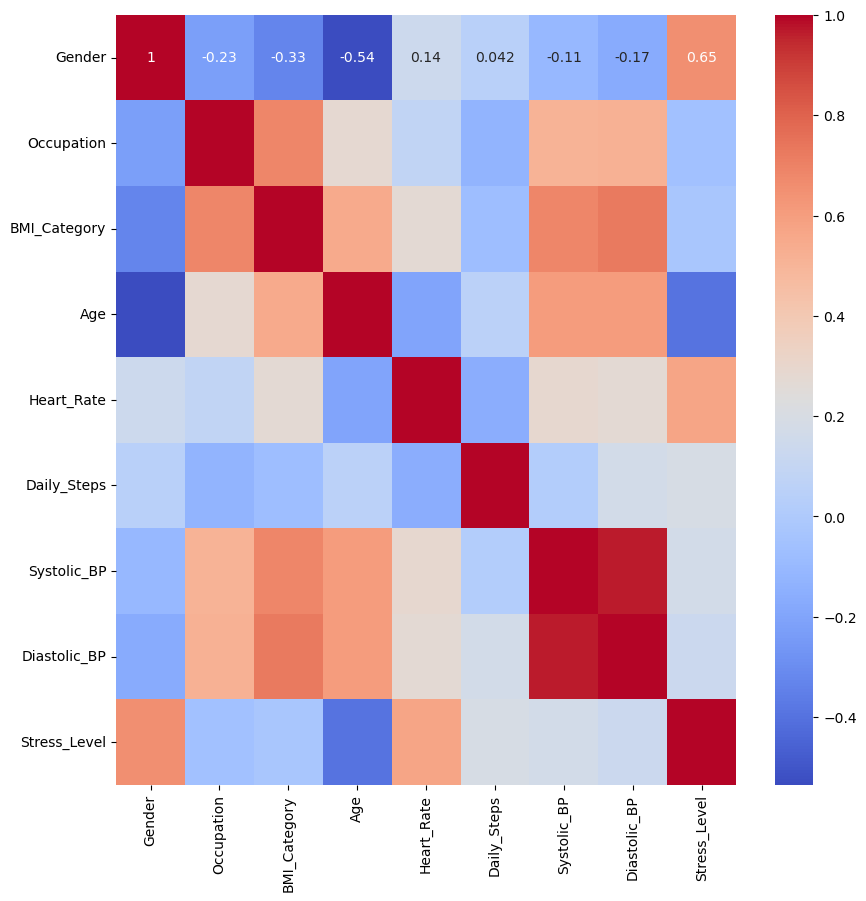

In [537]:
#drop the columns that are not needed for the model training
nwData.drop('Sleep_Disorder', axis=1, inplace=True)
nwData.drop('Physical_Activity_Level', axis=1, inplace=True)
nwData.drop('Sleep_Duration', axis=1, inplace=True)
nwData.drop('Quality_of_Sleep', axis=1, inplace=True)

#Plot the heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(nwData.corr(), cmap = 'coolwarm', annot = True)
plt.show

In [538]:
nwData.head()

,Gender,Occupation,BMI_Category,Age,Heart_Rate,Daily_Steps,Systolic_BP,Diastolic_BP,Stress_Level
0,1,9,2,27,77,4200,126,83,1
1,1,1,0,28,75,10000,125,80,1
2,1,1,0,28,75,10000,125,80,1
3,1,6,1,28,85,3000,140,90,1
4,1,6,1,28,85,3000,140,90,1


In [539]:
#standardize the numerical data after feature selection
scaler = StandardScaler()
nwData.iloc[:,3:8] =scaler.fit_transform(nwData.iloc[:,3:8])

In [540]:
nwData.head()

,Gender,Occupation,BMI_Category,Age,Heart_Rate,Daily_Steps,Systolic_BP,Diastolic_BP,Stress_Level
0,1,9,2,-1.604904,1.760658,-1.715773,-0.128470,-0.079885,1
1,1,1,0,-1.481331,1.244149,2.081414,-0.261214,-0.601161,1
2,1,1,0,-1.481331,1.244149,2.081414,-0.261214,-0.601161,1
3,1,6,1,-1.481331,3.826694,-2.501397,1.729950,1.136424,1
4,1,6,1,-1.481331,3.826694,-2.501397,1.729950,1.136424,1


### Alogrithms Selected ###
There are total 6 supervised learning algorithms selected to model the dataset in order to find the best modelling technique to detect the stress level of an individual.

In [541]:
#drop the Stress_Level and Person_ID for x variable that is to be used as the feature selections
#choose the Stress_Level as the y variable that acts as the label
#split the x variable and y variable into test set (30%) and train set (70%)
X = nwData.drop(['Stress_Level'],axis=1)
y = nwData.loc[:,['Stress_Level']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [542]:
# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (391, 8)
y_train shape: (391, 1)
X_test shape: (168, 8)
y_test shape: (168, 1)


Before applying SMOTE, we have 248 instances with Stress_Level equal to 1 and 143 instances with Stress_Level equal to 0. This indicates that data was imbalanced, with more instances of Stress_Level 1 than 0.

Before SMOTE:
Stress_Level
1               248
0               143
Name: count, dtype: int64


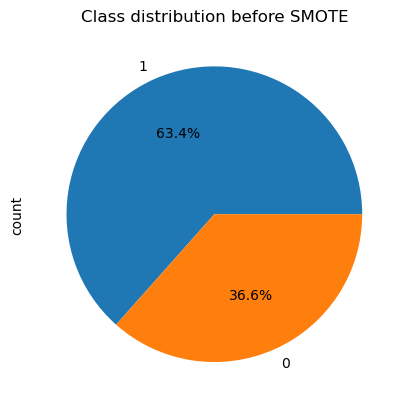

In [543]:
print('Before SMOTE:')
print(y_train.value_counts())

y_train['Stress_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Class distribution before SMOTE')
plt.show()

In [544]:
#use SMOTE to balance the number of occurrence of "0" and "1" in y variable
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

After applying SMOTE, we have 248 instances in each class, this is because SMOTE has created 105 synthetic instances of class (Stress_Level 0). SMOTE has oversampled the minority class (Stress_Level 0) to match the number of instances in the majority class (Stress_Level 1).

After SMOTE:
Stress_Level
0               248
1               248
Name: count, dtype: int64


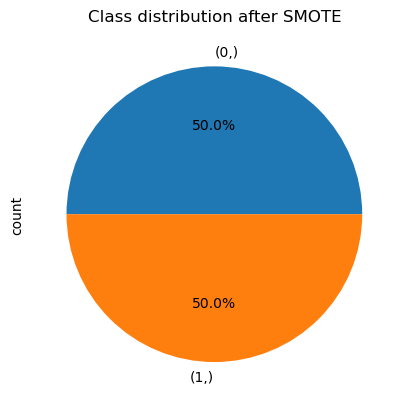

In [545]:
print('After SMOTE:')
print(y_train.value_counts())

y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', title='Class distribution after SMOTE')
plt.show()

In [546]:
#confirm the data has been balanced
len(X_test) + len(X_train)

664

In [547]:
X_train

,Gender,Occupation,BMI_Category,Age,Heart_Rate,Daily_Steps,Systolic_BP,Diastolic_BP
0,1,1,0,-0.987038,-0.047123,0.772039,-0.924936,-0.601161
1,1,1,0,-0.863465,0.469386,-1.192023,-0.261214,-0.601161
2,0,5,2,1.237280,1.244149,2.081414,1.729950,2.005216
3,0,8,2,-0.739892,2.793676,-1.061085,0.535252,0.441390
4,0,5,2,2.102292,-0.563632,0.117352,1.729950,2.005216
...,...,...,...,...,...,...,...,...
491,0,0,0,-0.492745,-0.563632,0.117352,-1.588657,-1.469953
492,0,0,0,-0.245599,-0.563632,0.117352,-1.588657,-1.469953
493,1,2,0,-0.748088,-0.246876,0.518848,-0.924936,-0.601161
494,0,5,2,2.349439,-0.563632,0.117352,1.729950,2.005216


#### 1) Random Forest Classifiers ####

In [548]:
#Random Forest algorithm
randomforest = RandomForestClassifier()

#train using the algorithm
randomforest.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=randomforest.predict(X_test)

#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[ 47   0]
 [  1 120]]
0.9940476190476191
0.9917355371900827
1.0
0.995850622406639


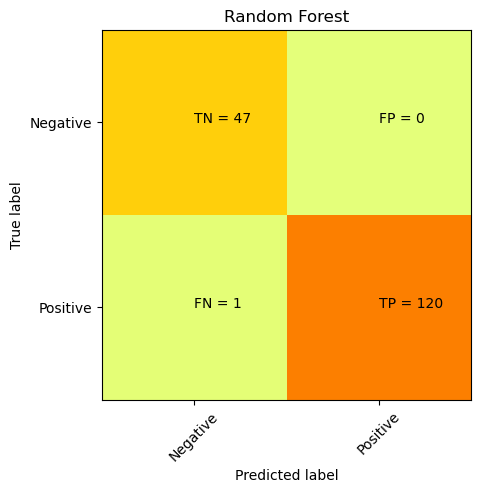

In [549]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### 2) K-nearest Neighbors ####

In [550]:
#K-Nearest Neighbour algorithm
neigh = KNeighborsClassifier(n_neighbors=3)

#train using the algorithm
neigh.fit(X_train,y_train) 

#use the trained set to do prediction on test set
y_pred=neigh.predict(X_test)

In [551]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[ 45   2]
 [  1 120]]
0.9821428571428571
0.9917355371900827
0.9836065573770492
0.9876543209876544


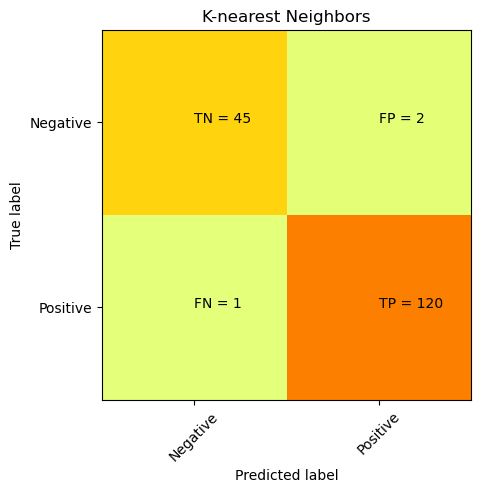

In [552]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('K-nearest Neighbors')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### 3) Logistics Regression ####

In [553]:
#Logistic Regression algorithm
lr = LogisticRegression()

#train using the algorithm
lr.fit(X_train, y_train)

#use the trained set to do prediction on test set
y_pred = lr.predict(X_test)

In [554]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[ 45   2]
 [  2 119]]
0.9761904761904762
0.9834710743801653
0.9834710743801653
0.9834710743801653


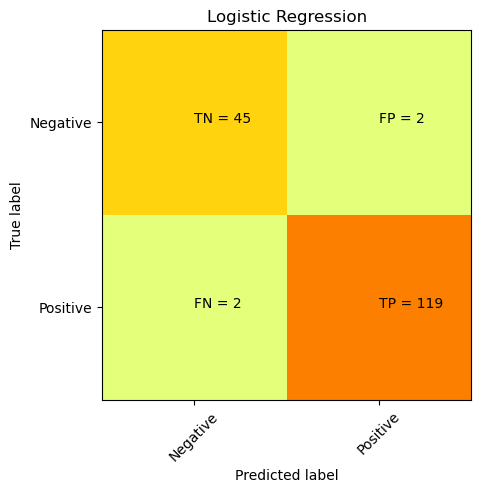

In [555]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### 4) Support Vector Classifier (SVC) ####

In [556]:
#Support Vector Machine algorithm
svc=SVC()

#train using the algorithm
svc.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=svc.predict(X_test)

In [557]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[ 45   2]
 [  1 120]]
0.9821428571428571
0.9917355371900827
0.9836065573770492
0.9876543209876544


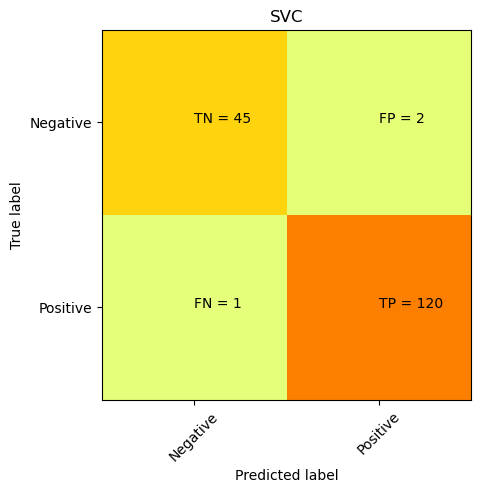

In [558]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVC')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### 5) Gaussian Naive Bayes ####

In [559]:
#Gaussian Naive Bayes algorithm
nb = GaussianNB()

#train using the algorithm
nb.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=nb.predict(X_test)

In [560]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[ 38   9]
 [  2 119]]
0.9345238095238095
0.9834710743801653
0.9296875
0.9558232931726908


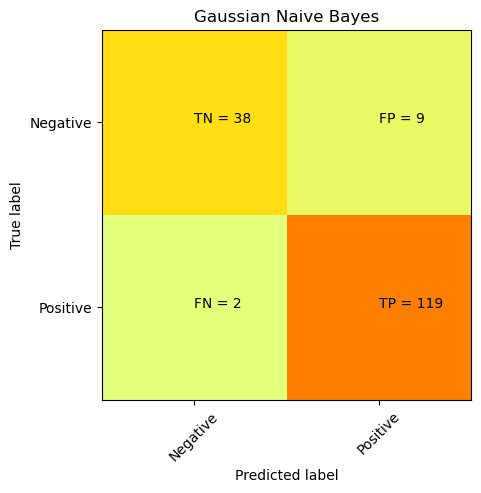

In [561]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Gaussian Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### 6) Decision Tree ####

In [562]:
#Decision Tree algorithm
dt = DecisionTreeClassifier()

#train using the algorithm
dt.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=dt.predict(X_test)

In [563]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[ 47   0]
 [  1 120]]
0.9940476190476191
0.9917355371900827
1.0
0.995850622406639


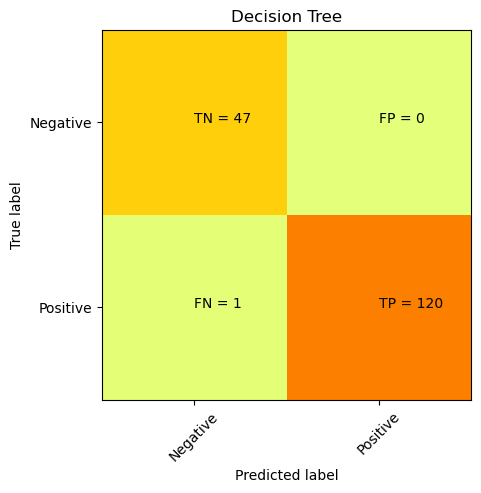

In [564]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Evaluation #

# Evaluation #

### Importance of Evaluation Element ###
In this case, it is important to get a low false positive value as it is used to determine the stress of an individual.

### Accuracy ###
Accuracy is the ratio of correctly predicted observation over the total observations. A high accuracy score cannot directly indicates that the algorithm with a high accuracy perform the best. Precision, recall and F1 score have to be investigated too.

<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>Accuracy Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9761</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9761</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9940</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9821</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9345</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9940</td> 
  </tr>
</table>

### Precision ###
Precision measures the ratio of correctly predicted positive observations to the total predicted positive observations. A higher value of precision indicates that the results are predicted accurately. It is important as a method to investigate the performance of an algorithm in predicting the labels.

<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>Precision Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9756</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9756</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 1.0</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9836</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9296</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 1.0</td> 
  </tr>
</table>


### Recall ###
Recall is the ratio of correctly predicted positive observations to the actual observations. It is useful in measuring the number of false positive values in the observation. 

<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>Recall Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9917</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9917</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9917</td> 
  </tr>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9917</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9834</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9917</td> 
  </tr>
</table>


### F1 Score ###
F1 Score is the weighted average of precision and recall. Therefore, this score takes both false positives and false negatives into account. It is a preferred method than accuracy score. F1 Score might be a better measure to use if we need to seek a balance between precision and recall.

<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>F1 Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9836</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9836</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9958</td> 
  </tr>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9876</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9558</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9958</td> 
  </tr>
</table>

In [565]:
#Comparison of Model Accuracy
model_names = ['Logistic Regression', 'Naive Bayes',  'SCM', 'KNN', 'Random Forest', 'Decision Tree',]
accuracy_scores = [97, 93, 98, 98, 99, 97]  
data = {'Model': model_names, 'Accuracy Score': accuracy_scores}

df = pd.DataFrame(data)

colors = px.colors.qualitative.Pastel

fig = px.bar(df, x='Model', y='Accuracy Score', text='Accuracy Score', 
             title='Comparison of Model Accuracy', color='Model',
             color_discrete_map={model: color for model, color in zip(model_names, colors)})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

In [566]:
#function to get user input for prediction
def get_user_input():
    gender = int(input("Gender (Male: 1, Female: 0): "))
    age = int(input("Age: "))
    print( "['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']")   
    occupation = int(input("Occupation (encoded): "))
    bmi_category = int(input("BMI Category (Underweight: 1, Normal: 2, Overweight: 3): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    daily_steps = int(input("Daily Steps: "))
    systolic_bp = int(input("Systolic Blood Pressure: "))
    dystolic_bp = int(input("Dystolic Blood Pressure: "))
    
    return np.array([[gender, age, occupation, bmi_category, heart_rate, daily_steps, systolic_bp, dystolic_bp]])

In [567]:
#Get the user input for prediction
user_input = get_user_input()

['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']


In [568]:
# Standardize the user input using the same scaler that was used to train the model
cols_to_standardize = ['Age', 'Heart_Rate', 'Daily_Steps', 'Systolic_BP', 'Diastolic_BP']
user_input_df = pd.DataFrame(user_input, columns=['Gender', 'Age', 'Occupation', 'BMI_Category', 'Heart_Rate', 'Daily_Steps', 'Systolic_BP', 'Diastolic_BP'])
user_input_df[cols_to_standardize] = scaler.transform(user_input_df[cols_to_standardize])
user_input_df.head()

,Gender,Age,Occupation,BMI_Category,Heart_Rate,Daily_Steps,Systolic_BP,Diastolic_BP
0,1,-0.987038,5,3,6.40924,-2.501397,2.393672,2.005216


In [569]:
# Reorder the columns of the user input dataframe to match with the training data and then predict the stress level using the random forest model
new_order = ['Gender', 'Occupation', 'BMI_Category', 'Age', 'Heart_Rate', 'Daily_Steps', 'Systolic_BP', 'Diastolic_BP']
user_input_df = user_input_df.reindex(columns=new_order)

# Predict the stress level using the random forest model and display the result
predicted_stress_level = randomforest.predict(user_input_df)
print("Predicted Stress Level:", predicted_stress_level[0])

Predicted Stress Level: 1


## Conclusion

In this project, I have built a personalized stress detection system using machine learning techniques. I have used a dataset of various factors that affect stress levels, including gender, occupation, BMI category, age, heart rate, daily steps, systolic blood pressure, and diastolic blood pressure. We have preprocessed the data, split it into training and testing sets, and trained a random forest model to predict stress levels. We have also implemented a user interface to allow users to input their personal information and receive a predicted stress level.

The performance of the model has been evaluated using various metrics such as accuracy, precision, recall, and F1 score. The results indicate that the model is able to accurately predict stress levels.